In [1]:
import pandas as pd

df = pd.read_csv("../data/311.csv")
df.head()

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101004655986,2023-02-04 23:49:00,2023-02-13 08:30:00,NaN,OVERDUE,Open,,Electrical,Inspectional Services,Building,...,E13,Jamaica Plain,11,Ward 11,1106,36-38 Brookside Ave,2130.0,42.3135,-71.1030,Constituent Call
1,101004684674,2023-02-21 10:55:00,2024-02-21 10:55:04,NaN,ONTIME,Open,,Tree Maintenance,Parks & Recreation Department,Trees,...,B2,Boston,14,04,0410,1 Palace Rd,2115.0,42.3384,-71.0997,City Worker App
2,101004693969,2023-03-01 23:42:00,NaN,NaN,ONTIME,Open,,Mattress Pickup,Public Works Department,Sanitation,...,B2,Roxbury,13,Ward 14,1401,93 Brunswick St,2121.0,42.3108,-71.0803,Constituent Call
3,101004633246,2023-01-17 12:47:49,2023-03-22 12:47:49,NaN,ONTIME,Open,,Graffiti Removal,Property Management,Graffiti,...,A1,Downtown / Financial District,4,03,0308,107 South St,2111.0,42.3514,-71.0579,Citizens Connect App
4,101004615807,2023-01-01 03:05:00,NaN,NaN,ONTIME,Open,,Loud Parties/Music/People,Boston Police Department,Noise Disturbance,...,D4,Roxbury,13,08,0803,811 Massachusetts Ave,2119.0,42.3327,-71.0729,Constituent Call


In [2]:
df.columns.values.tolist()

['case_enquiry_id',
 'open_dt',
 'target_dt',
 'closed_dt',
 'ontime',
 'case_status',
 'closure_reason',
 'case_title',
 'subject',
 'reason',
 'type',
 'queue',
 'department',
 'submittedphoto',
 'closedphoto',
 'location',
 'fire_district',
 'pwd_district',
 'city_council_district',
 'police_district',
 'neighborhood',
 'neighborhood_services_district',
 'ward',
 'precinct',
 'location_street_name',
 'location_zipcode',
 'latitude',
 'longitude',
 'source']

In [20]:
import re
df[df['type'].str.contains('.*sidewalk.*', flags = re.IGNORECASE)]['type'].unique()

array(['Sidewalk Repair (Make Safe)', 'Unshoveled Sidewalk',
       'Sidewalk Cover / Manhole', 'Sidewalk Repair'], dtype=object)

In [3]:
import matplotlib.pyplot as plt

df['type'].unique()

array(['Electrical', 'Tree Maintenance Requests', 'Mattress_Pickup',
       'Graffiti Removal', 'Loud Parties/Music/People',
       'Unsafe Dangerous Conditions', 'Sidewalk Repair (Make Safe)',
       'Park Improvement Requests', 'Unsatisfactory Living Conditions',
       'Equipment Repair', 'Street Light Outages', 'Abandoned Vehicles',
       'Recycling Cart Return', 'Request for Recycling Cart',
       'Animal Lost', 'Sign Repair', 'CE Collection',
       'Request for Pothole Repair', 'Protection of Adjoining Property',
       'Requests for Street Cleaning', 'Schedule a Bulk Item Pickup SS',
       'Parking Enforcement', 'Ground Maintenance',
       'Animal Generic Request', 'Rodent Activity',
       'Improper Storage of Trash (Barrels)', 'Needle Pickup',
       'General Lighting Request', 'Pick up Dead Animal',
       'Schedule a Bulk Item Pickup', 'Poor Conditions of Property',
       'Empty Litter Basket', 'Working Beyond Hours',
       'Contractors Complaint', 'Chronic Dampness/M

For this project, we might be interested in Unsafe Dangerous Conditions, Sidewalk Repair (Make Safe), Unshoveled Sidewalk, Sidewalk Cover / Manhole, Missing Sign, New Sign  Crosswalk or Pavement Marking, Sidewalk Repair.

In [4]:
# Drop unnecessary columns 
df.drop([
 'queue',
 'department',
 'submittedphoto',
 'closedphoto',
 'fire_district',
 'pwd_district',
 'city_council_district',
 'police_district',
 'neighborhood',
 'neighborhood_services_district',
 'ward',
 'precinct',], axis=1, inplace=True)

In [5]:
# Getting the relevant rows
df = df.loc[df['type'].isin(['Sidewalk Repair (Make Safe)', 'Unshoveled Sidewalk', 'Sidewalk Cover / Manhole', 'Missing Sign', 'Sidewalk Repair'])]

In [6]:
# Getting open cases
df[df['closed_dt'].isnull()]

,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,type,location,location_street_name,location_zipcode,latitude,longitude,source
6,101004625054,2023-01-09 16:15:00,2023-01-10 16:15:46,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,Sidewalk Repair (Make Safe),27 Briarcliff Ter Mattapan MA 02126,27 Briarcliff Ter,2126.0,42.2713,-71.0858,Constituent Call
27,101004616095,2023-01-01 15:10:00,2023-01-04 08:30:00,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,Sidewalk Repair (Make Safe),INTERSECTION of Alban St & Talbot Ave Dorches...,INTERSECTION Alban St & Talbot Ave,NaN,42.3594,-71.0587,Citizens Connect App
101,101004617325,2023-01-03 09:07:00,2023-01-04 09:07:17,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,Sidewalk Repair (Make Safe),44 Appleton St Boston MA 02116,44 Appleton St,2116.0,42.3457,-71.0719,Citizens Connect App
345,101004618821,2023-01-04 08:43:00,2023-01-05 08:43:06,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,Sidewalk Repair (Make Safe),98 Saint Rose St Jamaica Plain MA 02130,98 Saint Rose St,2130.0,42.3045,-71.1184,Citizens Connect App
375,101004619001,2023-01-04 10:08:00,2023-01-05 10:08:28,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,Sidewalk Repair (Make Safe),73 Tremont St Boston MA 02108,73 Tremont St,2108.0,42.3578,-71.0608,Citizens Connect App
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50180,101004722177,2023-03-09 10:29:00,2023-03-10 10:29:40,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,Sidewalk Repair (Make Safe),507 E Seventh St South Boston MA 02127,507 E Seventh St,2127.0,42.3321,-71.0403,Constituent Call
50202,101004722465,2023-03-09 13:21:00,2023-03-10 13:21:49,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,Sidewalk Repair (Make Safe),30 Birch St Roslindale MA 02131,30 Birch St,2131.0,42.2863,-71.1305,Citizens Connect App
50212,101004722603,2023-03-09 15:13:00,2023-03-10 15:13:01,NaN,OVERDUE,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,Sidewalk Repair (Make Safe),43 Joy St Boston MA 02114,43 Joy St,2114.0,42.3598,-71.0649,Constituent Call
50313,101004724021,2023-03-10 17:38:00,2023-03-14 08:30:00,NaN,ONTIME,Open,,Sidewalk Repair (Make Safe),Public Works Department,Highway Maintenance,Sidewalk Repair (Make Safe),38 Osceola St Mattapan MA 02126,38 Osceola St,2126.0,42.2620,-71.1022,Constituent Call


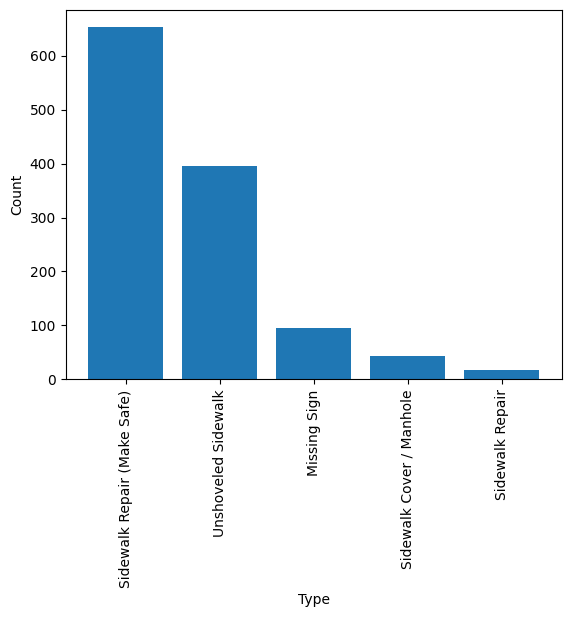

In [8]:
counts = df['type'].value_counts()

plt.bar(counts.index, counts.values)
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [7]:
from folium import Map, Marker, Icon

base_map = Map(location=[42.35866, -71.05674])

df['latitude'] = df['latitude'].astype(float)
df['longitude'] = df['longitude'].astype(float)
types = ['Sidewalk Repair (Make Safe)', 'Unshoveled Sidewalk', 'Sidewalk Cover / Manhole', 'Missing Sign', 'Sidewalk Repair']

colors = {'Sidewalk Repair (Make Safe)': 'red', 'Unshoveled Sidewalk': 'blue', 'Sidewalk Cover / Manhole': 'green', 'Missing Sign': 'purple', 'Sidewalk Repair': 'orange'}

for index, row in df.iterrows():
    Marker([row['latitude'], row['longitude']], popup=row['type'], tooltip=row['type'], icon=Icon(color=colors[row['type']])).add_to(base_map)

base_map.save('../maps/311_map.html')

From the 311 dataset, I have filtered out 515 open requests that related to sidewalk issues and repair requests and mapped it using folium. Since the dataset is very recent, we might be able to utilize these data in addition to what we already have to calculate the latest accessability scores for the sideswalks. 

In [ ]:
# df.to_csv("../data/311_new.csv")